In [29]:
import torch
from torch.distributions.multinomial import Multinomial
from d2l import torch as d2l

In [13]:
fair_probs = torch.ones(6) / 6
Multinomial(1, fair_probs).sample()

tensor([0., 1., 0., 0., 0., 0.])

In [14]:
Multinomial(10, fair_probs).sample()

tensor([4., 1., 0., 2., 2., 1.])

In [19]:
counts = Multinomial(10000, fair_probs).sample()
counts / 10000

tensor([0.1699, 0.1620, 0.1685, 0.1693, 0.1614, 0.1689])

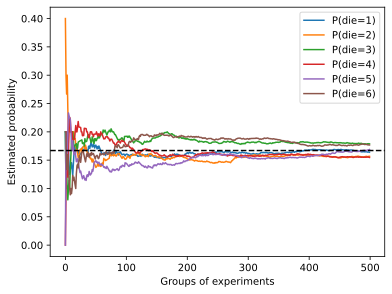

In [39]:
counts = Multinomial(5, fair_probs).sample((500, ))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='--')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

In [47]:
# HIV e.g. 
P_D11_given_H1 = 1
P_D10_given_H1 = 0
P_D11_given_H0 = 0.01
P_D10_given_H0 = 0.99

P_H1 = 0.0015

P_D11 = (P_H1 * P_D11_given_H1) + ((1-P_H1) * P_D11_given_H0)
P_D11_H1 = P_H1 * P_D11_given_H1

P_H1_given_D1 = P_D11_H1 / P_D11
P_H1_given_D1

0.13060513713539398

In [51]:
# GOAL: P_H1_given_D11_D21
P_D21_given_H1 = 0.98
P_D20_given_H1 = 0.02
P_D21_given_H0 = 0.03
P_D20_given_H0 = 0.97

P_D11_D21_given_H1 = P_D11_given_H1 * P_D21_given_H1
P_D11_D21_given_H0 = P_D11_given_H0 * P_D21_given_H0
P_D11_D21_given_H1, P_D11_D21_given_H0

(0.98, 0.0003)

In [55]:
P_D11_D21 = (P_H1 * P_D11_D21_given_H1) + ((1 - P_H1) * P_D11_D21_given_H0)
P_D11_D21_H1 = P_D11_D21_given_H1 * P_H1
P_H1_given_D11_D21 = P_D11_D21_H1 / P_D11_D21
P_H1_given_D11_D21

0.8307196744935152